In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

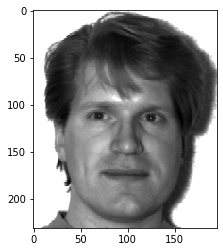

In [2]:
im = plt.imread("trainingset/subject01.centerlight.png")
plt.imshow(im, cmap='gray')
plt.show()

image_shape = im.shape

In [3]:
import glob

# List of filepaths for all training images
im_filepaths = glob.glob("trainingset/*")

# Add all image matrices to a numpy array to create a big data matrix of images
training_images = np.array([plt.imread(image).flatten() for image in im_filepaths])

# Inspect dimensions of the training set
dims = training_images.shape
# print("Total number of {} x {} shaped images = {}".format(dims[1], dims[2], dims[0]))
dims

(135, 45045)

In [14]:
for i in range(135):
    plt.imshow(training_images[i,:,:] - mean_face)
    plt.show()

IndexError: too many indices for array

In [ ]:
#STEP1: Convert the face images to face vectors
import glob

# List of filepaths for all training images
im_filepaths = glob.glob("trainingset/*")

# Add all image matrices to a numpy array to create a big data matrix of images
training_images = np.array([plt.imread(image).flatten() for image in im_filepaths])
face_vector = np.transpose(training_images)

# Inspect dimensions of the training set
print(face_vector.shape)
print(face_vector)

In [ ]:
#STEP2: Normalize the face vectors by calculating the average face vector and subtracting it from each vector
avg_face_vector = face_vector.mean(axis=1)
avg_face_vector = avg_face_vector.reshape(face_vector.shape[0], 1)
normalized_face_vector = face_vector - avg_face_vector
print(normalized_face_vector)

In [ ]:
#STEP3: Calculate the Covariance Matrix or the Sigma
covariance_matrix = np.cov(np.transpose(normalized_face_vector))
# covariance_matrix = np.transpose(normalized_face_vector).dot(normalized_face_vector)
print(covariance_matrix)

In [ ]:
#STEP4: Calculate Eigen Vectors
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
eigen_vectors[0]

In [ ]:
#STEP5: Select the K best Eigen Faces, K < M
print(eigen_vectors.shape)
k = 15
k_eigen_vectors = eigen_vectors[0:k, :]
print(k_eigen_vectors.shape)

(15, 45045)


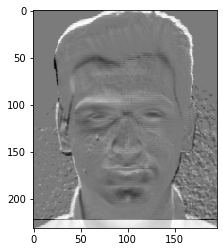

In [24]:
#STEP6: Convert lower dimensionality K Eigen Vectors to Original Dimensionality
eigen_faces = k_eigen_vectors.dot(np.transpose(normalized_face_vector))
print(eigen_faces.shape)

plt.imshow(np.imag(eigen_faces[14,:].reshape(image_shape)), cmap='gray')
plt.show()

In [26]:
# STEP7: Represent Each eigen face as combination of the K Eigen Vectors
# weights = eigen_faces.dot(normalized_face_vector)
weights = np.transpose(normalized_face_vector).dot(np.transpose(eigen_faces))
print(weights.shape)

(135, 15)


Target shape =  (135,)
Index =  6


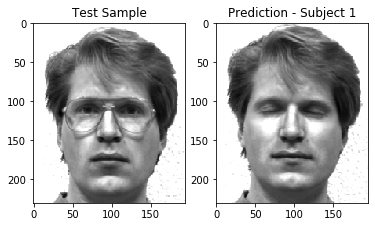

Target shape =  (135,)
Index =  6


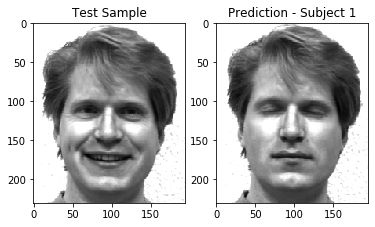

Target shape =  (135,)
Index =  14


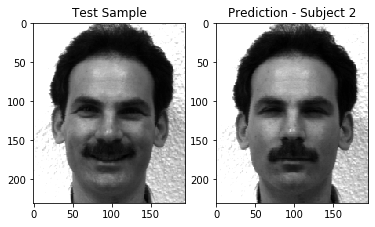

Target shape =  (135,)
Index =  14


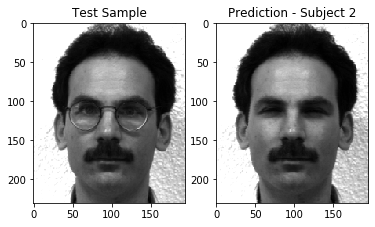

Target shape =  (135,)
Index =  24


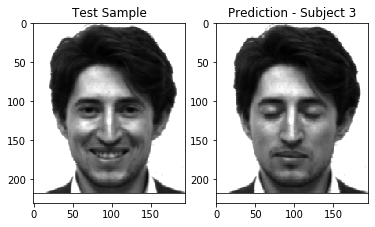

Target shape =  (135,)
Index =  93


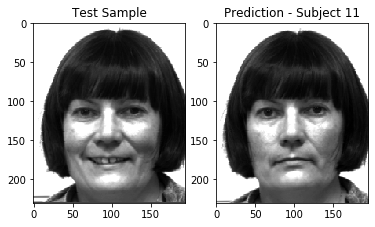

Target shape =  (135,)
Index =  101


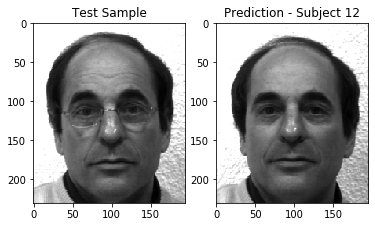

Target shape =  (135,)
Index =  106


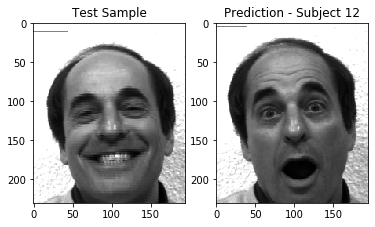

Target shape =  (135,)
Index =  117


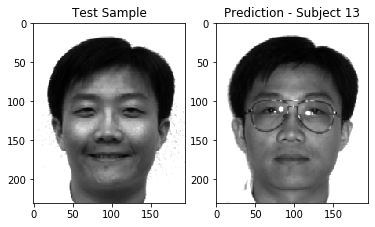

Target shape =  (135,)
Index =  131


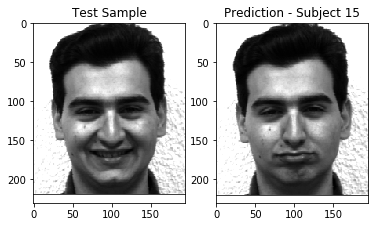

In [28]:
test_data = glob.glob("testset/*")

for test_add in test_data:
    
    test_img = plt.imread(test_add)
    
    test_img = test_img.reshape(45045, 1)
    test_normalized_face_vector = test_img - avg_face_vector
    test_weight = np.transpose(test_normalized_face_vector).dot(np.transpose(eigen_faces))


    index =  np.argmin(np.linalg.norm(test_weight - weights, axis=1)) 
    print("Target shape = ", np.linalg.norm(test_weight - weights, axis=1).shape)
    print("Index = ", index)
    fig, ax = plt.subplots(1, 2)
    
    ax[0].imshow(test_img.reshape((231, 195)), cmap='gray')
    ax[0].set_title("Test Sample")
    
    ax[1].imshow(training_images[index].reshape((231, 195)), cmap='gray')
    ax[1].set_title("Prediction - Subject {}".format(int(np.ceil(index/9))))
    
    plt.show()